# Step 1. 인물모드 직접 해보기
* ## 3장의 인물모드 사진만들기
* ## 고양이 아웃포커싱
* ## 크로마키 배경 합성

In [1]:
#라이브러리 임포트

import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

## 이미지 불러오기

In [2]:
# 이미지 파일이 위치한 디렉토리 경로를 직접 지정
img_dir = './images/'

# 이미지 파일 경로 생성
img_1_path = os.path.join(img_dir, 'img_1.png')
img_2_path = os.path.join(img_dir, 'img_2.png')
img_3_path = os.path.join(img_dir, 'img_3.png')

# OpenCV를 사용해 이미지 읽기
img_1 = cv2.imread(img_1_path)
img_2 = cv2.imread(img_2_path)
img_3 = cv2.imread(img_3_path)

# 이미지들이 제대로 로드되었는지 확인
if img_1 is not None:
    print("img_1 loaded successfully")
else:
    print("Failed to load img_1")

if img_2 is not None:
    print("img_2 loaded successfully")
else:
    print("Failed to load img_2")

if img_3 is not None:
    print("img_3 loaded successfully")
else:
    print("Failed to load img_3")
    
    
print(img_1.shape, "\n")
print(img_2.shape, "\n")
print(img_3.shape)

img_1 loaded successfully
img_2 loaded successfully
img_3 loaded successfully
(3024, 4032, 3) 

(1847, 1412, 3) 

(1440, 1080, 3)


## 모델 다운로드

In [3]:
model_dir = os.getenv('HOME')+'/aiffel/Ex04/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/Ex04/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x788a64160cd0>)

## Segmentation 모델 생성

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

## 모델에 이미지 입력

In [5]:
segvalues_1, output_1 = model.segmentAsPascalvoc(img_1_path)
segvalues_2, output_2 = model.segmentAsPascalvoc(img_2_path)
segvalues_3, output_3 = model.segmentAsPascalvoc(img_3_path)

## 출력값 확인

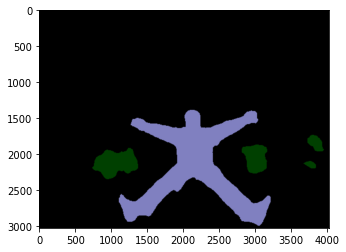

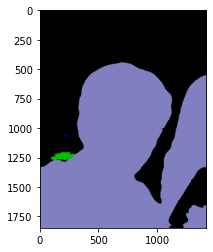

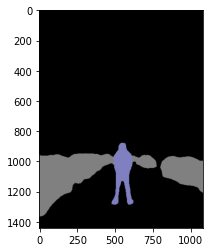

In [6]:
plt.imshow(output_1)
plt.show()

plt.imshow(output_2)
plt.show()

plt.imshow(output_3)
plt.show()

In [7]:
print(segvalues_1, "\n")
print(segvalues_2, "\n")
print(segvalues_3,)

{'class_ids': array([ 0, 15, 16]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])} 

{'class_ids': array([ 0,  9, 15, 18]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])} 

{'class_ids': array([ 0,  7, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, 

첫 사진은 사람과 pottedplant
두 번째 사진은 의자, 사람, 소파
세 번째 사진은 차와 사람

## 컬러맵 생성

In [8]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [9]:
colormap[15]

array([192, 128, 128])

In [10]:
seg_color = (128,128,192)

## seg_color로 이루어진 마스크 생성

(3024, 4032)


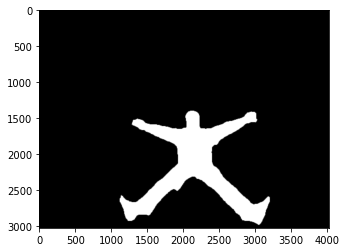

(1847, 1412)


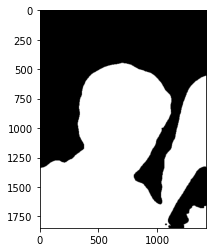

(1440, 1080)


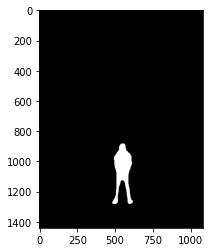

In [11]:
seg_map_1 = np.all(output_1==seg_color, axis=-1)
seg_map_2 = np.all(output_2==seg_color, axis=-1) 
seg_map_3 = np.all(output_3==seg_color, axis=-1) 
print(seg_map_1.shape) 
plt.imshow(seg_map_1, cmap='gray')
plt.show()

print(seg_map_2.shape) 
plt.imshow(seg_map_2, cmap='gray')
plt.show()

print(seg_map_3.shape) 
plt.imshow(seg_map_3, cmap='gray')
plt.show()

## 원본과 겹쳐보기

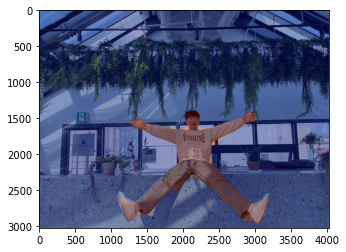

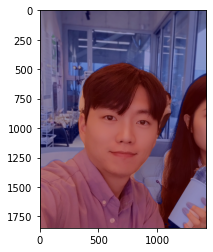

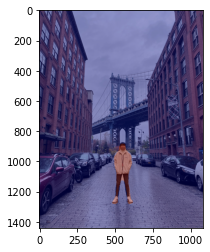

In [12]:
img_1show = img_1.copy()
img_2show = img_2.copy()
img_3show = img_3.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img1_mask = seg_map_1.astype(np.uint8) * 255
img2_mask = seg_map_2.astype(np.uint8) * 255
img3_mask = seg_map_3.astype(np.uint8) * 255


# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask_1 = cv2.applyColorMap(img1_mask, cv2.COLORMAP_JET)
color_mask_2 = cv2.applyColorMap(img2_mask, cv2.COLORMAP_JET)
color_mask_3 = cv2.applyColorMap(img3_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_1show = cv2.addWeighted(img_1show, 0.6, color_mask_1, 0.4, 0.0)
img_2show = cv2.addWeighted(img_2show, 0.6, color_mask_2, 0.4, 0.0)
img_3show = cv2.addWeighted(img_3show, 0.6, color_mask_3, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_1show, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_2show, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_3show, cv2.COLOR_BGR2RGB))
plt.show()

## 배경 흐리게 하기

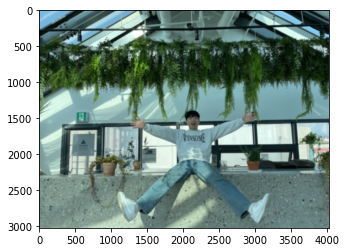

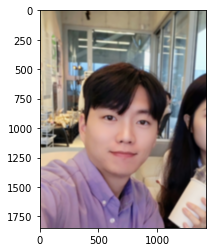

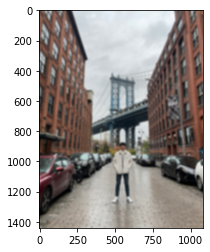

In [13]:
img_1_blur = cv2.blur(img_1, (15,15))
img_2_blur = cv2.blur(img_2, (15,15))
img_3_blur = cv2.blur(img_3, (15,15))

plt.imshow(cv2.cvtColor(img_1_blur, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_2_blur, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_3_blur, cv2.COLOR_BGR2RGB))
plt.show()

## 흐려진 이미지에서 세그멘테이션 마스크를 이용해 배경만 추출

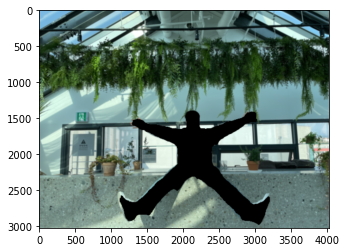

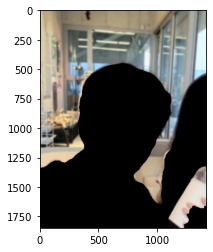

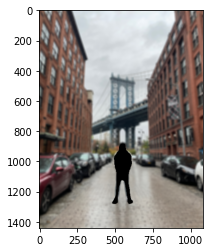

In [14]:
img1_mask_color = cv2.cvtColor(img1_mask, cv2.COLOR_GRAY2BGR)
img2_mask_color = cv2.cvtColor(img2_mask, cv2.COLOR_GRAY2BGR)
img3_mask_color = cv2.cvtColor(img3_mask, cv2.COLOR_GRAY2BGR)

img1_bg_mask = cv2.bitwise_not(img1_mask_color)
img2_bg_mask = cv2.bitwise_not(img2_mask_color)
img3_bg_mask = cv2.bitwise_not(img3_mask_color)

img1_bg_blur = cv2.bitwise_and(img_1_blur, img1_bg_mask)
img2_bg_blur = cv2.bitwise_and(img_2_blur, img2_bg_mask)
img3_bg_blur = cv2.bitwise_and(img_3_blur, img3_bg_mask)#교집합만 가지고옴

plt.imshow(cv2.cvtColor(img1_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img2_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img3_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

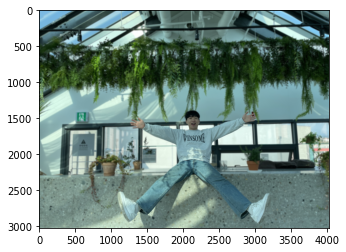

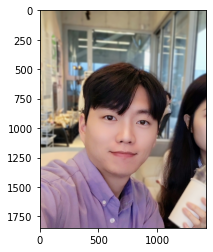

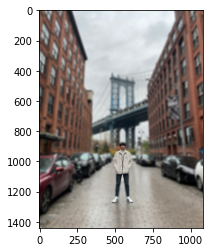

In [15]:
img1_concat = np.where(img1_mask_color==255, img_1, img1_bg_blur)
img2_concat = np.where(img2_mask_color==255, img_2, img2_bg_blur)
img3_concat = np.where(img3_mask_color==255, img_3, img3_bg_blur)

plt.imshow(cv2.cvtColor(img1_concat, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img2_concat, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img3_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 위의 코드들을 토대로 함수화 해보겠습니다.... (첫 도전)

In [18]:
def blur_background(image_path, model_path):
    # 이미지 불러오기
    img = cv2.imread(image_path)
    
    # 모델 로드
    model = semantic_segmentation()
    model.load_pascalvoc_model(model_path)

    # 이미지 세그멘테이션
    seg_values, output = model.segmentAsPascalvoc(image_path)

    # 이미지 블러 처리
    img_blur = cv2.blur(img, (15, 15))
    
    # 세그멘테이션 결과 마스크 추출
    mask = np.all(output == [128, 128, 192], axis=-1).astype(np.uint8) * 255
    mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    # 배경 마스크 반전
    bg_mask = cv2.bitwise_not(mask_color)
    
    # 블러된 배경과 원본 이미지를 결합
    img_bg_blur = cv2.bitwise_and(img_blur, bg_mask)
    img_concat = np.where(mask_color == 255, img, img_bg_blur)

    # 결과 출력
    return img_concat

## 사용을 해보면....

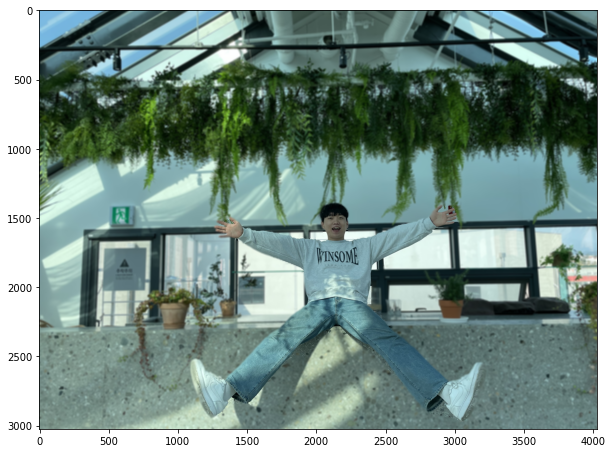

In [19]:
# 모델 파일 경로 및 이미지 경로 설정
model_path = './models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
image_path = './images/img_1.png'

# 함수 호출
result_image = blur_background(image_path, model_path)

# 결과 이미지 표시
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()

## 오 된다!

# 고양이 해보자

## 함수 가져오고, 마스크에서 output 결과를 ouput== [0, 0, 64] 으로 바꾸면 cat이다

In [25]:
def blur_withoutcat(image_path, model_path):
    # 이미지 불러오기
    img = cv2.imread(image_path)
    
    # 모델 로드
    model = semantic_segmentation()
    model.load_pascalvoc_model(model_path)

    # 이미지 세그멘테이션
    seg_values, output = model.segmentAsPascalvoc(image_path)

    # 이미지 블러 처리
    img_blur = cv2.blur(img, (15, 15))
    
    # 세그멘테이션 결과 마스크 추출
    mask = np.all(output == [0, 0, 64], axis=-1).astype(np.uint8) * 255
    mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    # 배경 마스크 반전
    bg_mask = cv2.bitwise_not(mask_color)
    
    # 블러된 배경과 원본 이미지를 결합
    img_bg_blur = cv2.bitwise_and(img_blur, bg_mask)
    img_concat = np.where(mask_color == 255, img, img_bg_blur)

    # 결과 출력
    return img_concat

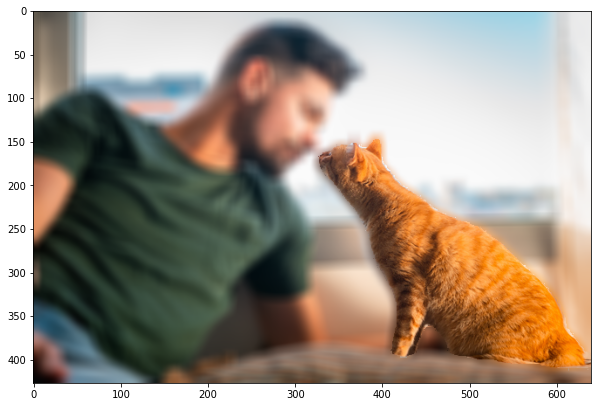

In [26]:
# 모델 파일 경로 및 이미지 경로 설정
model_path = './models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
image_path = './images/cat_with_human.png'

# 함수 호출
result_image = blur_withoutcat(image_path, model_path)

# 결과 이미지 표시
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()

## 함수화가 이렇게 편한건지 이제알았다

In [27]:
def replace_background(image_path, model_path, background_image_path):
    # 원본 이미지 불러오기
    img = cv2.imread(image_path)
    
    # 새로운 배경 이미지 불러오기 및 크기 조정
    background_img = cv2.imread(background_image_path)
    background_img = cv2.resize(background_img, (img.shape[1], img.shape[0]))  # 원본 이미지 크기에 맞춤

    # 세그멘테이션 모델 로드
    model = semantic_segmentation()
    model.load_pascalvoc_model(model_path)

    # 이미지 세그멘테이션
    seg_values, output = model.segmentAsPascalvoc(image_path)

    # 객체 마스크 추출 (사람 객체라고 가정, [128, 128, 192] 색상 사용)
    mask = np.all(output == [128, 128, 192], axis=-1).astype(np.uint8) * 255
    mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    # 배경 마스크 반전
    bg_mask = cv2.bitwise_not(mask_color)

    # 원본 이미지에서 객체 부분만 추출
    img_foreground = cv2.bitwise_and(img, mask_color)
    
    # 배경 이미지에서 배경만 추출
    img_background = cv2.bitwise_and(background_img, bg_mask)

    # 객체와 새로운 배경을 합성
    img_combined = cv2.add(img_foreground, img_background)

    # 결과 이미지 반환
    return img_combined

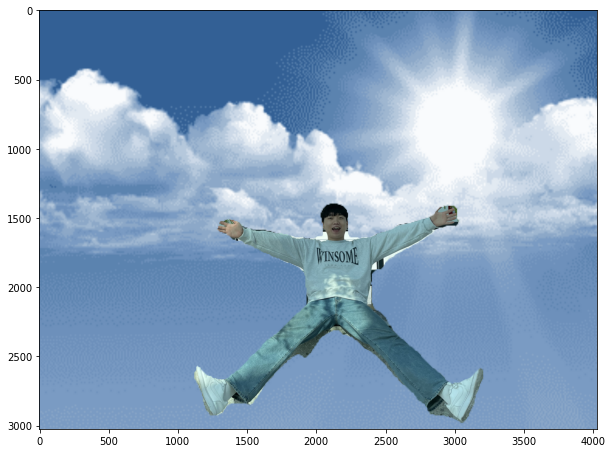

In [28]:
model_path = './models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
image_path = './images/img_1.png'
background_image_path = './images/background.png'

result_image = replace_background(image_path, model_path, background_image_path)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()

## 함수화 처음해본 기분과 비슷한 그림이다 (물론 G선생님이 해주셨다)

# Step 2. 사진에서 문제점 찾기

* ## 제가 생각하는 첫 번째 문제점은 경계면이 너무 삐뚤하다는 것이다.
* ## 두 번째 문제점은 손가락 끝이나 다른 사물과 경계에 있는 신체 부위중 일부가 잘리는 경우가 꽤 많은 것 같다.

## Step 3. 해결방법 제안해보기

* ## 일단은 모델이 구분할 수 있는 클래스의 수가 너무 적다
* ## 더욱 세분화해서 구분한다면 자연스러운 경계선을 가질 수 있을 것 같다.
* ## 예를 들면 (그림자)라던지 (이어폰)처럼 사람의 신체부위와 밀접한 곳에 위치할 확률이 높은 객체를 구분할 수 있으면 더욱 좋은 경계선이 생길 것 같다.

## 회고

* ## 중간중간 팀원분들과 회의를 하느라 더 깊이 못했지만, 다행히 끝낼 수 있었습니다.
* ## 오늘은 함수화라는 것을 처음해봐서 뿌듯합니다.
* ## 물론 아직 GPT의 도움없이는 힘드니깐 더 열심히 공부해서 혼자의 힘으로도 어느정도 할 수 있도록 해봐야겠습니다.